In [108]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
pd.set_option('display.width', 1000)
# Установить максимальное количество отображаемых столбцов
pd.set_option('display.max_columns', None)
# Установить максимальную длину строки в ячейке
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


In [110]:


# Чтение файла CSV
data = pd.read_csv('laptop-price.csv')

# Вывод первых 10 строк
print("Первые 10 строк:")
print(data.head(10))
print()

data.info()

# Название столбцов
print("\nНазвание столбцов:")
print(data.columns)

# Определение числовых столбцов
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("\nЧисловые столбцы:")
print(numeric_columns)

Первые 10 строк:
   index Company   TypeName  Ram  Weight        Price  Touchscreen  Ips         ppi      Cpu brand  HDD  SSD  Hybrid  Flash_Storage Gpu brand                  os
0      0   Apple  Ultrabook    8    1.37   71378.6832            0    1  226.983005  Intel Core i5    0  128       0              0     Intel                 Mac
1      1   Apple  Ultrabook    8    1.34   47895.5232            0    0  127.677940  Intel Core i5    0    0       0            128     Intel                 Mac
2      2      HP   Notebook    8    1.86   30636.0000            0    0  141.211998  Intel Core i5    0  256       0              0     Intel  Others/No OS/Linux
3      3   Apple  Ultrabook   16    1.83  135195.3360            0    1  220.534624  Intel Core i7    0  512       0              0       AMD                 Mac
4      4   Apple  Ultrabook    8    1.37   96095.8080            0    1  226.983005  Intel Core i5    0  256       0              0     Intel                 Mac
5      5   

In [59]:
from sklearn.preprocessing import LabelEncoder

# Кодирование категориальных переменных
categorical_features = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

numeric_features = ['Ram', 'Weight', 'ppi', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage', 'Price']
categorical_features = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os' , 'Touchscreen', 'Ips']


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1268 non-null   int64  
 1   Company        1268 non-null   int64  
 2   TypeName       1268 non-null   int64  
 3   Ram            1268 non-null   int64  
 4   Weight         1268 non-null   float64
 5   Price          1268 non-null   float64
 6   Touchscreen    1268 non-null   int64  
 7   Ips            1268 non-null   int64  
 8   ppi            1268 non-null   float64
 9   Cpu brand      1268 non-null   int64  
 10  HDD            1268 non-null   int64  
 11  SSD            1268 non-null   int64  
 12  Hybrid         1268 non-null   int64  
 13  Flash_Storage  1268 non-null   int64  
 14  Gpu brand      1268 non-null   int64  
 15  os             1268 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 158.6 KB


In [61]:
# Проверка пропущенных значений
missing_values = data.isnull().sum()
print("\nПропущенные значения:")
print(missing_values)


Пропущенные значения:
index            0
Company          0
TypeName         0
Ram              0
Weight           0
Price            0
Touchscreen      0
Ips              0
ppi              0
Cpu brand        0
HDD              0
SSD              0
Hybrid           0
Flash_Storage    0
Gpu brand        0
os               0
dtype: int64


In [62]:
data.transpose().isna().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1263    0
1264    0
1265    0
1266    0
1267    0
Length: 1268, dtype: int64

In [63]:
data.describe()

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
count,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000
mean,652.887224,6.436909,2.582019,8.461356,2.080047,59924.981175,0.145110,0.282334,145.935819,2.438486,415.741325,183.634069,9.075710,4.580442,1.171924,1.847792
std,376.581012,4.101702,1.240742,5.569898,0.806482,37340.350650,0.352351,0.450313,43.445969,0.994937,517.152677,186.641125,93.825228,30.615945,0.645866,0.402855
min,0.000000,0.000000,0.000000,1.000000,0.690000,9270.720000,0.000000,0.000000,44.019462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326.750000,4.000000,1.000000,4.000000,1.500000,31914.720000,0.000000,0.000000,127.335675,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,652.500000,7.000000,3.000000,8.000000,2.040000,52107.840000,0.000000,0.000000,141.211998,3.000000,0.000000,256.000000,0.000000,0.000000,1.000000,2.000000
75%,980.250000,10.000000,3.000000,8.000000,2.320000,79346.840400,0.000000,1.000000,157.350512,3.000000,1000.000000,256.000000,0.000000,0.000000,2.000000,2.000000
max,1302.000000,18.000000,5.000000,64.000000,11.100000,324954.720000,1.000000,1.000000,352.465147,4.000000,2000.000000,1024.000000,1000.000000,512.000000,2.000000,2.000000


In [64]:
def beautify_float(value):
  return "{:.2f}".format(value)

data.describe().applymap(beautify_float)

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
count,1268.00,1268.00,1268.00,1268.00,1268.00,1268.00,1268.00,1268.00,1268.00,1268.00,1268.00,1268.00,1268.00,1268.00,1268.00,1268.00
mean,652.89,6.44,2.58,8.46,2.08,59924.98,0.15,0.28,145.94,2.44,415.74,183.63,9.08,4.58,1.17,1.85
std,376.58,4.10,1.24,5.57,0.81,37340.35,0.35,0.45,43.45,0.99,517.15,186.64,93.83,30.62,0.65,0.40
min,0.00,0.00,0.00,1.00,0.69,9270.72,0.00,0.00,44.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,326.75,4.00,1.00,4.00,1.50,31914.72,0.00,0.00,127.34,2.00,0.00,0.00,0.00,0.00,1.00,2.00
50%,652.50,7.00,3.00,8.00,2.04,52107.84,0.00,0.00,141.21,3.00,0.00,256.00,0.00,0.00,1.00,2.00
75%,980.25,10.00,3.00,8.00,2.32,79346.84,0.00,1.00,157.35,3.00,1000.00,256.00,0.00,0.00,2.00,2.00
max,1302.00,18.00,5.00,64.00,11.10,324954.72,1.00,1.00,352.47,4.00,2000.00,1024.00,1000.00,512.00,2.00,2.00


In [65]:
data.drop('index', inplace=True, axis=1)
data.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,1,4,8,1.37,71378.6832,0,1,226.983005,2,0,128,0,0,1,0
1,1,4,8,1.34,47895.5232,0,0,127.677940,2,0,0,0,128,1,0
2,7,3,8,1.86,30636.0000,0,0,141.211998,2,0,256,0,0,1,1
3,1,4,16,1.83,135195.3360,0,1,220.534624,3,0,512,0,0,0,0
4,1,4,8,1.37,96095.8080,0,1,226.983005,2,0,256,0,0,1,0


In [66]:
from sklearn.preprocessing import StandardScaler

# Создаем экземпляр StandardScaler
scaler = StandardScaler()

# Стандартизируем данные
data[['ppi', 'HDD', 'SSD', 'Flash_Storage']] = scaler.fit_transform(data[['ppi', 'HDD', 'SSD', 'Flash_Storage']])

print(data.head())

   Company  TypeName  Ram  Weight        Price  Touchscreen  Ips       ppi  \
0        1         4    8    1.37   71378.6832            0    1  1.866207   
1        1         4    8    1.34   47895.5232            0    0 -0.420409   
2        7         3    8    1.86   30636.0000            0    0 -0.108772   
3        1         4   16    1.83  135195.3360            0    1  1.717725   
4        1         4    8    1.37   96095.8080            0    1  1.866207   

   Cpu brand       HDD       SSD  Hybrid  Flash_Storage  Gpu brand  os  
0          2 -0.804222 -0.298198       0      -0.149669          1   0  
1          2 -0.804222 -0.984277       0       4.032809          1   0  
2          2 -0.804222  0.387881       0      -0.149669          1   1  
3          3 -0.804222  1.760038       0      -0.149669          0   0  
4          2 -0.804222  0.387881       0      -0.149669          1   0  


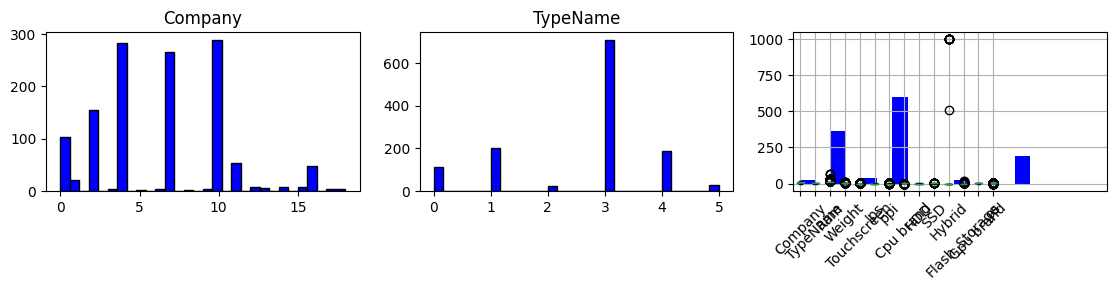

In [67]:
data.drop(columns=['Price']).boxplot(rot=45, figsize=(15, 9))
plt.tight_layout()
plt.show()

In [68]:
print(data['Ram'].sort_values(ascending=False))

1034    64
68      64
699     64
943     32
804     32
        ..
88       2
1257     2
1265     2
1251     2
685      1
Name: Ram, Length: 1268, dtype: int64


In [69]:
data.drop([68, 699, 1034], axis=0, inplace=True)

In [70]:
print(data['Hybrid'].sort_values(ascending=False))

1259    1000
145     1000
979     1000
1049    1000
1084    1000
        ... 
1247       0
1248       0
1249       0
1250       0
0          0
Name: Hybrid, Length: 1265, dtype: int64


In [71]:
data.drop('Hybrid', axis=1, inplace=True)
data

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Flash_Storage,Gpu brand,os
0,1,4,8,1.37,71378.6832,0,1,1.866207,2,-0.804222,-0.298198,-0.149669,1,0
1,1,4,8,1.34,47895.5232,0,0,-0.420409,2,-0.804222,-0.984277,4.032809,1,0
2,7,3,8,1.86,30636.0000,0,0,-0.108772,2,-0.804222,0.387881,-0.149669,1,1
3,1,4,16,1.83,135195.3360,0,1,1.717725,3,-0.804222,1.760038,-0.149669,0,0
4,1,4,8,1.37,96095.8080,0,1,1.866207,2,-0.804222,0.387881,-0.149669,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,10,0,4,1.80,33992.6400,1,1,0.262837,3,-0.804222,-0.298198,-0.149669,1,2
1264,10,0,16,1.30,79866.7200,1,1,2.996113,3,-0.804222,1.760038,-0.149669,1,2
1265,10,3,2,1.50,12201.1200,0,0,-0.782904,4,-0.804222,-0.984277,1.941570,1,2
1266,7,3,6,2.19,40705.9200,0,0,-1.047257,3,1.130206,-0.984277,-0.149669,0,2


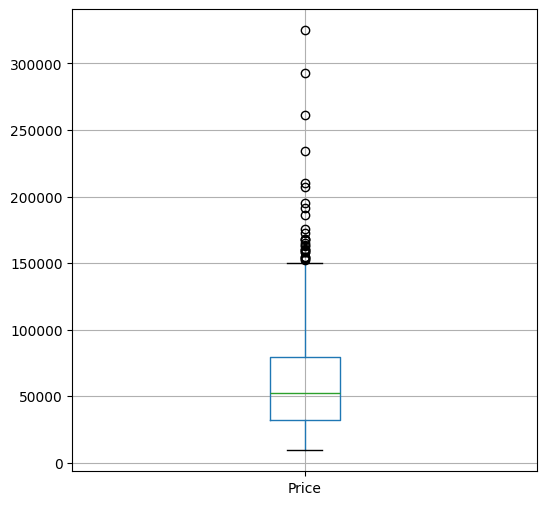

In [72]:
data.boxplot(column='Price', figsize=(6, 6))
plt.show()

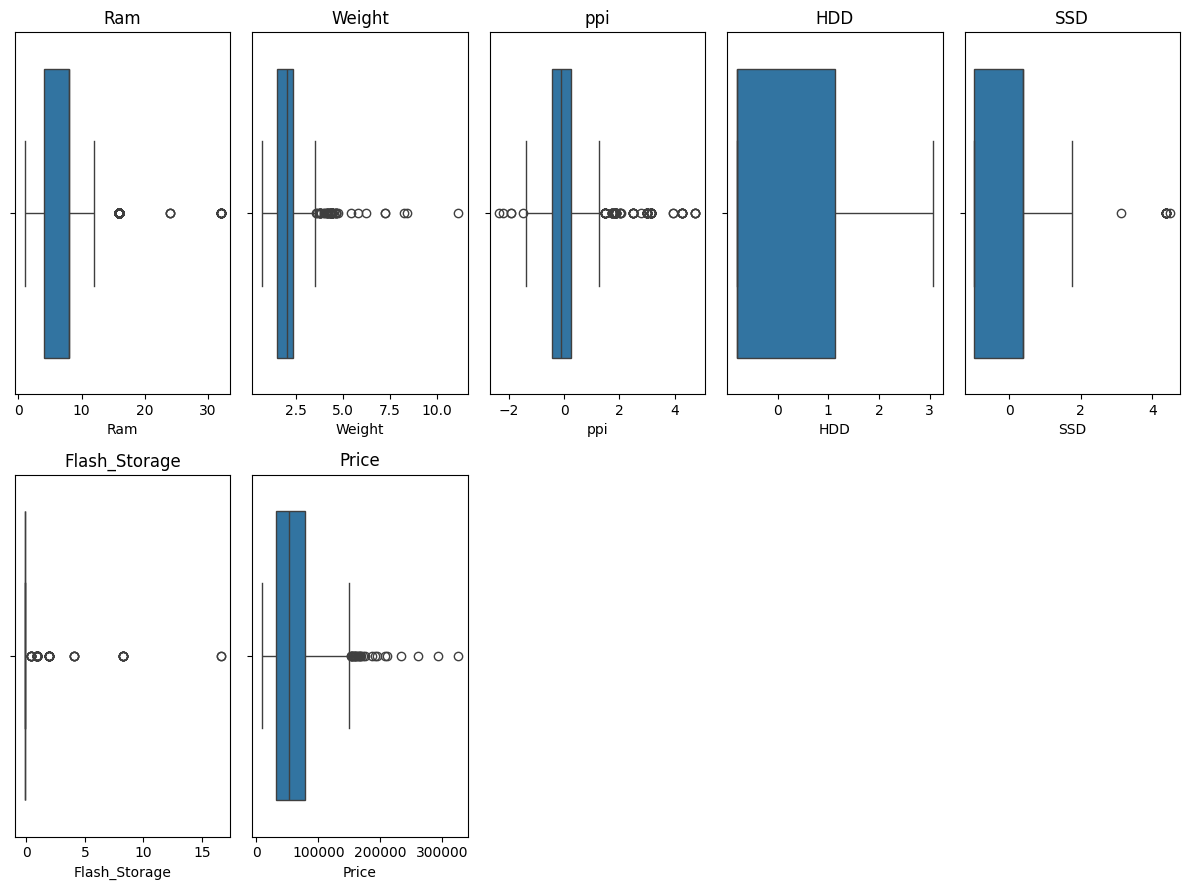

In [73]:
numeric_features = ['Ram', 'Weight', 'ppi', 'HDD', 'SSD',  'Flash_Storage', 'Price']
# Визуализация распределения числовых переменных
plt.figure(figsize=(12, 9))

for i, col in enumerate(numeric_features):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [74]:
data.Weight.replace(data.Weight.max(), data.Weight.quantile(0.99), inplace=True)
data.ppi.replace(data.ppi.max(), data.ppi.quantile(0.99), inplace=True)

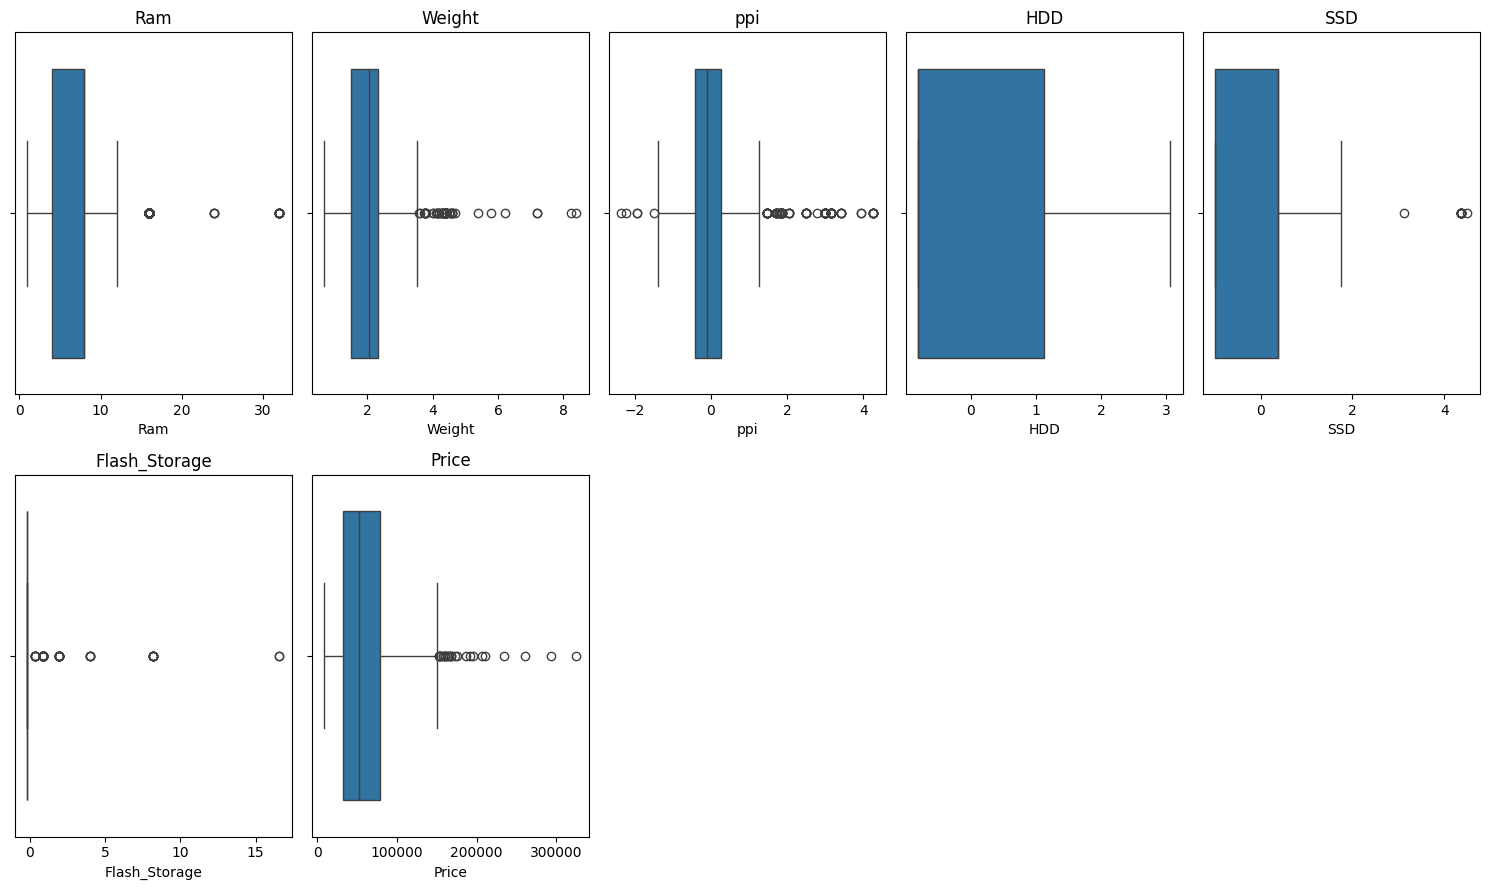

In [75]:
numeric_features = ['Ram', 'Weight', 'ppi', 'HDD', 'SSD',  'Flash_Storage', 'Price']
# Визуализация распределения числовых переменных
plt.figure(figsize=(15, 9))

for i, col in enumerate(numeric_features):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

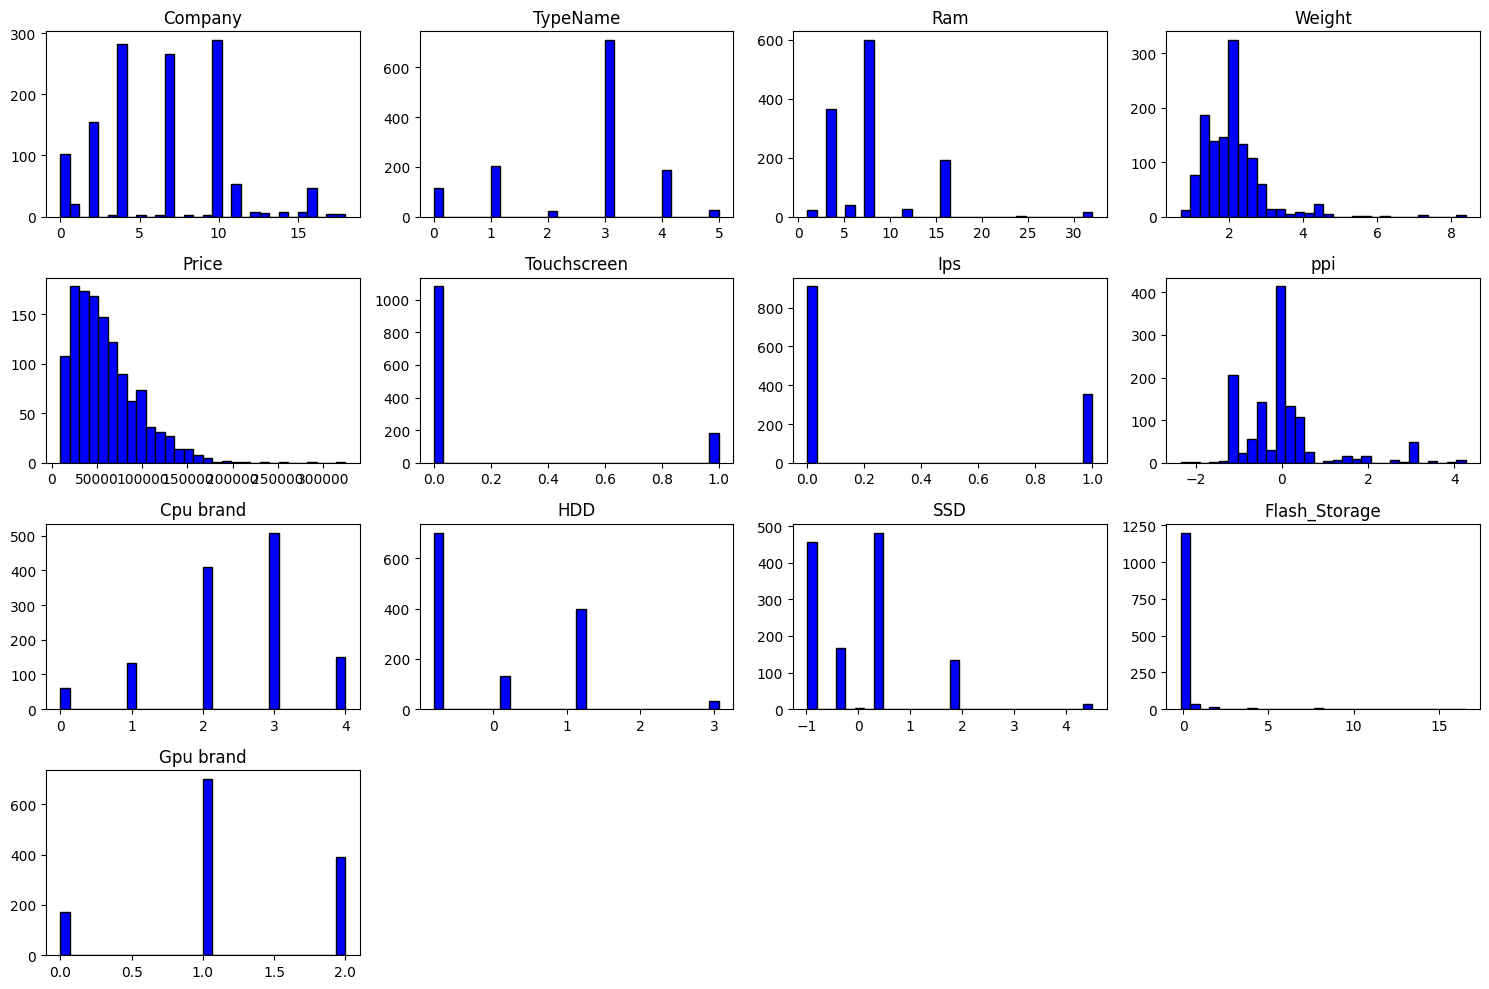

In [76]:
plt.figure(figsize=(15, 10))
i = 1
for col in data.columns[:-1]:
  plt.subplot(4, 4, i)
  plt.hist(data[col], bins=30, color="blue", linewidth=1, edgecolor="black")
  plt.title(col)
  i += 1

plt.tight_layout()
plt.show()

In [77]:
import scipy.stats as stats
for col in data.columns[:-1]:
  print(col, stats.shapiro(data[col]))

Company ShapiroResult(statistic=np.float64(0.9359491424873866), pvalue=np.float64(6.732419294892245e-23))
TypeName ShapiroResult(statistic=np.float64(0.8131499305562542), pvalue=np.float64(6.297975740396937e-36))
Ram ShapiroResult(statistic=np.float64(0.7446741660916065), pvalue=np.float64(2.615858471396669e-40))
Weight ShapiroResult(statistic=np.float64(0.8398808824024409), pvalue=np.float64(7.388759560666359e-34))
Price ShapiroResult(statistic=np.float64(0.8940837710639324), pvalue=np.float64(1.2351446673214083e-28))
Touchscreen ShapiroResult(statistic=np.float64(0.41961004846018934), pvalue=np.float64(4.343775847795875e-53))
Ips ShapiroResult(statistic=np.float64(0.5624852468046074), pvalue=np.float64(1.7433458194788128e-48))
ppi ShapiroResult(statistic=np.float64(0.7916448444422598), pvalue=np.float64(1.996890515407365e-37))
Cpu brand ShapiroResult(statistic=np.float64(0.8867679429413369), pvalue=np.float64(1.8999826086947434e-29))
HDD ShapiroResult(statistic=np.float64(0.722263024

                Company  TypeName       Ram    Weight     Price  Touchscreen  \
Company        1.000000 -0.003584  0.063561 -0.118688  0.146873     0.035059   
TypeName      -0.003584  1.000000 -0.241378 -0.223750 -0.127293    -0.408616   
Ram            0.063561 -0.241378  1.000000  0.331231  0.749477     0.121648   
Weight        -0.118688 -0.223750  0.331231  1.000000  0.172397    -0.261520   
Price          0.146873 -0.127293  0.749477  0.172397  1.000000     0.194522   
Touchscreen    0.035059 -0.408616  0.121648 -0.261520  0.194522     1.000000   
Ips            0.116243 -0.159335  0.205816  0.006859  0.254061     0.151526   
ppi            0.066674 -0.048200  0.324507 -0.290039  0.478629     0.440159   
Cpu brand      0.012189 -0.116160  0.231414 -0.061904  0.246868     0.122916   
HDD           -0.129709 -0.197456  0.109517  0.437640 -0.091790    -0.204544   
SSD            0.134279 -0.067748  0.598630 -0.047954  0.664064     0.253041   
Flash_Storage -0.101817  0.079285 -0.058

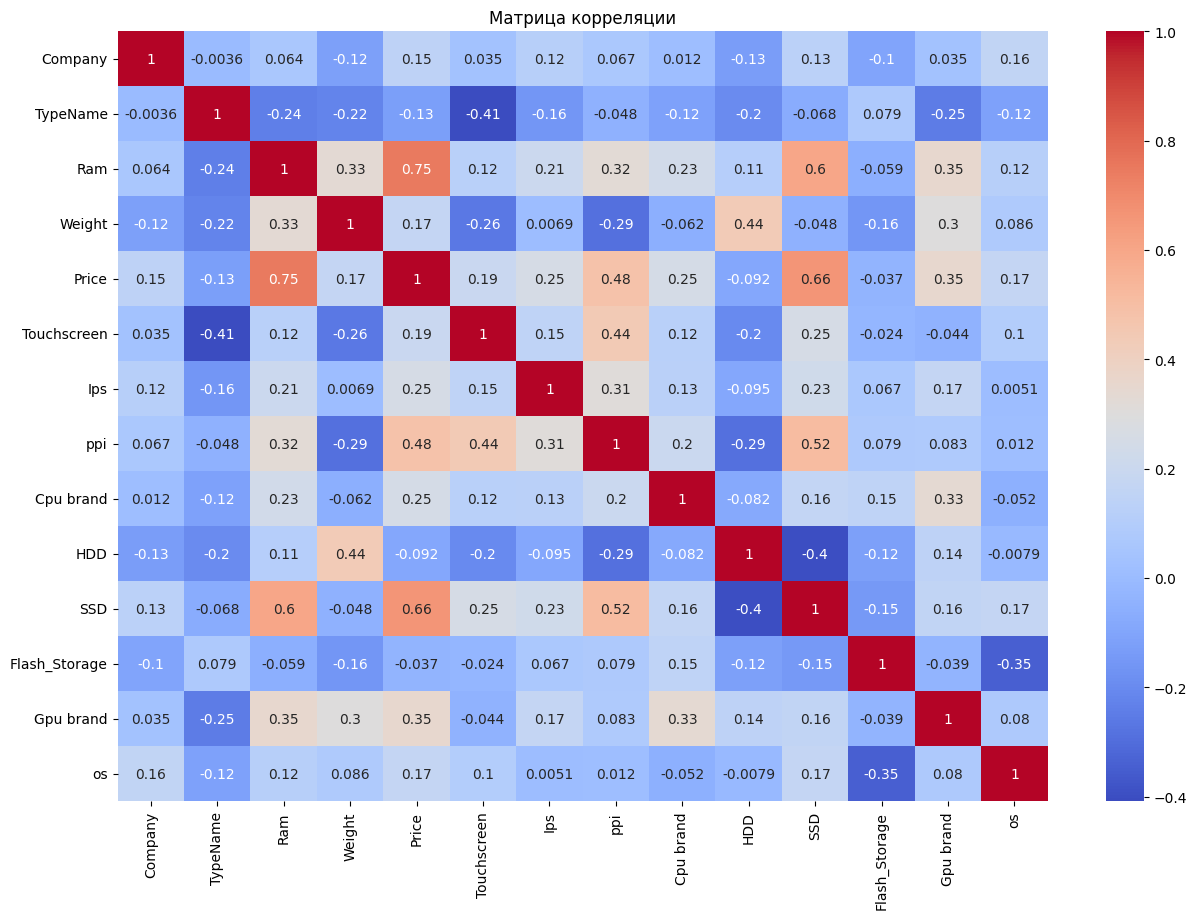

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление матрицы корреляции
correlation_matrix = data.corr()
print(correlation_matrix)
# Создание heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

In [79]:
X_cols = ["Ram", "SSD", "ppi", "Gpu brand", 'Ips', 'Cpu brand']
y_col = "Price"

In [80]:
import statsmodels.api
statsmodels.sandbox.stats.runs.runstest_1samp(data[y_col], cutoff="median")

(np.float64(-1.5464646535059152), np.float64(0.12199239020938411))

In [81]:
X = data[X_cols]
y = data[y_col]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
from sklearn.linear_model import LinearRegression

# Обучение модели
model = LinearRegression().fit(X_train, y_train)

In [83]:
import sklearn.metrics as metrics

y_model = model.predict(X_test)
R2 = metrics.r2_score(y_test, y_model)

print(R2)

0.696174451168791


In [84]:
from scipy import stats

def Ftest(alpha, df1, df2, R2):
    F = (R2 / (1 - R2)) * (df2 / df1)
    Fcrit = stats.f.ppf(1 - alpha, dfn=df1, dfd=df2)
    return F >= Fcrit

In [85]:
alpha = 0.05
df1 = len(X_cols)  # Количество признаков
df2 = len(X_test) - df1 - 1  # Степени свободы ошибки

print(f"Гипотеза о незначимости полной модели отклоняется на уровне значимости {alpha}:",
      Ftest(alpha=alpha, df1=df1, df2=df2, R2=R2))

Гипотеза о незначимости полной модели отклоняется на уровне значимости 0.05: True


In [86]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Перебор всех комбинаций признаков, удаляя по одному признаку
for comb in combinations(X_cols, r=len(X_cols) - 1):  # Убираем по одному признаку
    print(f"Комбинация признаков: {comb}")

    # Обучаем модель на текущей комбинации признаков
    model_comb = LinearRegression().fit(X_train[list(comb)], y_train)

    # Предсказания модели
    y_pred_comb = model_comb.predict(X_test[list(comb)])

    # Вычисление R2
    R2_comb = r2_score(y_test, y_pred_comb)
    print(f"\tR2 = {R2_comb:.4f}")

    # Проверка значимости модели с использованием F-теста
    df1_comb = len(comb)  # Степени свободы модели
    df2_comb = len(X_test) - df1_comb - 1  # Степени свободы ошибки
    print(f"\tГипотеза о незначимости модели отклоняется на уровне значимости {alpha}:",
          Ftest(alpha=alpha, df1=df1_comb, df2=df2_comb, R2=R2_comb))

Комбинация признаков: ('Ram', 'SSD', 'ppi', 'Gpu brand', 'Ips')
	R2 = 0.6964
	Гипотеза о незначимости модели отклоняется на уровне значимости 0.05: True
Комбинация признаков: ('Ram', 'SSD', 'ppi', 'Gpu brand', 'Cpu brand')
	R2 = 0.6955
	Гипотеза о незначимости модели отклоняется на уровне значимости 0.05: True
Комбинация признаков: ('Ram', 'SSD', 'ppi', 'Ips', 'Cpu brand')
	R2 = 0.6834
	Гипотеза о незначимости модели отклоняется на уровне значимости 0.05: True
Комбинация признаков: ('Ram', 'SSD', 'Gpu brand', 'Ips', 'Cpu brand')
	R2 = 0.6664
	Гипотеза о незначимости модели отклоняется на уровне значимости 0.05: True
Комбинация признаков: ('Ram', 'ppi', 'Gpu brand', 'Ips', 'Cpu brand')
	R2 = 0.6760
	Гипотеза о незначимости модели отклоняется на уровне значимости 0.05: True
Комбинация признаков: ('SSD', 'ppi', 'Gpu brand', 'Ips', 'Cpu brand')
	R2 = 0.5459
	Гипотеза о незначимости модели отклоняется на уровне значимости 0.05: True


In [87]:
print(f"Коэффициенты модели: {model.coef_}, свободный член: {model.intercept_}")


Коэффициенты модели: [ 3591.24604099 10159.21600974  5498.49531587  6093.30815858
  1455.75171359   742.91600437], свободный член: 20152.512287827987


0.696174451168791


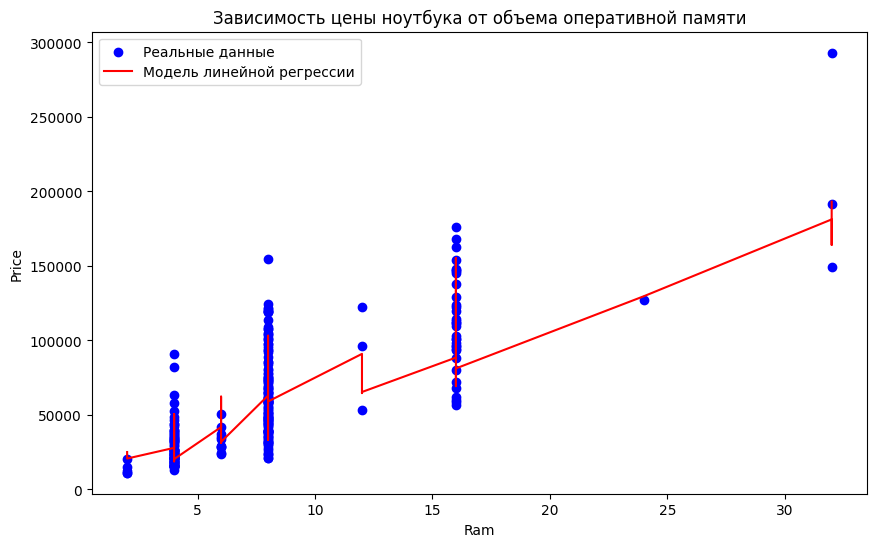

In [88]:
import matplotlib.pyplot as plt

sorted_indices = X_test.sort_values(by='Ram').index
X_test_sorted = X_test.loc[sorted_indices]
y_model_sorted = model.predict(X_test_sorted)

# Построение графика
plt.figure(figsize=(10, 6))

# Scatter plot для реальных данных
plt.scatter(X_test['Ram'], y_test, color="blue", label="Реальные данные")

# Линия регрессии
plt.plot(X_test_sorted['Ram'], y_model_sorted, color="red", label="Модель линейной регрессии")

# Настройка меток и заголовка
plt.xlabel('Ram')
plt.ylabel('Price')
plt.title('Зависимость цены ноутбука от объема оперативной памяти')
plt.legend()


y_pred = model.predict(X_test)
R2 = metrics.r2_score(y_test, y_pred)
print(R2)

# Отображение графика
plt.show()

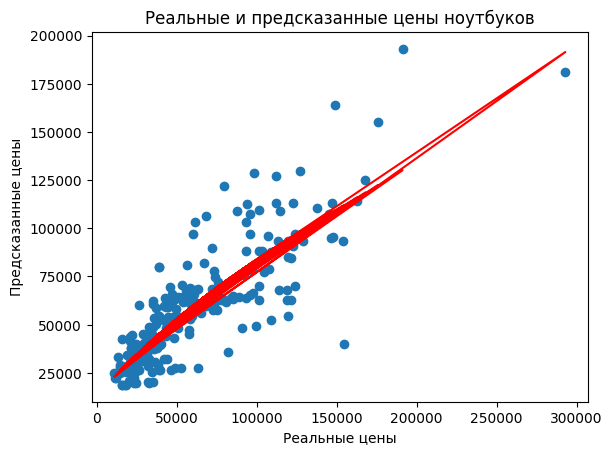

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures




plt.scatter(y_test, y_pred)
plt.xlabel("Реальные цены")
plt.ylabel("Предсказанные цены")
plt.title("Реальные и предсказанные цены ноутбуков")

# Добавление линии тренда
z = np.polyfit(y_test, y_pred, 3)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r")

plt.show()

In [90]:
y_pred = model.predict(X_test)
R2 = metrics.r2_score(y_test, y_pred)
print(R2)

0.696174451168791


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Определим диапазон возможностей для параметра n_estimators
param_grid = {'n_estimators': range(50, 201, 10)}

# Создание модели с помощью функции GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=6)


# Обучение модели и поиск наилучшего параметра
grid_search.fit(X_train, y_train)

# Найденный наилучший параметр
best_n_estimators = grid_search.best_params_['n_estimators']
print(best_n_estimators)
# Создание модели с найденным наилучшим параметром
rf_model = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
rf_model.fit(X_train, y_train)

150


RandomForestRegressor(n_estimators=150, random_state=42)

In [92]:
from sklearn.metrics import r2_score

y_pred_train = rf_model.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)

print(f"R^2 на обучающей выборке: {r2_train}")

R^2 на обучающей выборке: 0.861987785229918


In [93]:
from sklearn.metrics import r2_score
y_pred_test = rf_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)

print(f"R^2 на тестовой выборке: {r2_test}")

R^2 на тестовой выборке: 0.696174451168791


R^2 на тестовой выборке: 0.696174451168791


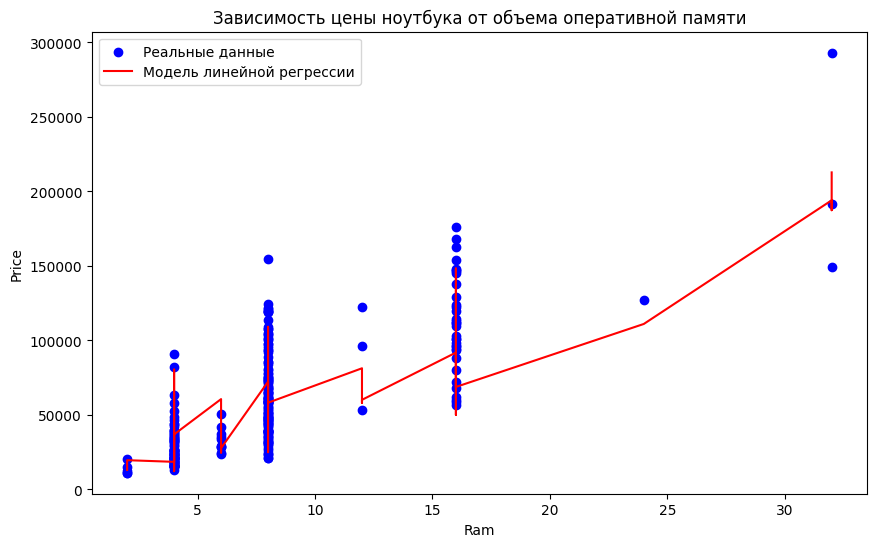

In [94]:
import matplotlib.pyplot as plt

sorted_indices = X_test.sort_values(by='Ram').index
X_test_sorted = X_test.loc[sorted_indices]
y_model_sorted = rf_model.predict(X_test_sorted)

# Построение графика
plt.figure(figsize=(10, 6))

# Scatter plot для реальных данных
plt.scatter(X_test['Ram'], y_test, color="blue", label="Реальные данные")

# Линия регрессии
plt.plot(X_test_sorted['Ram'], y_model_sorted, color="red", label="Модель линейной регрессии")

# Настройка меток и заголовка
plt.xlabel('Ram')
plt.ylabel('Price')
plt.title('Зависимость цены ноутбука от объема оперативной памяти')
plt.legend()


from sklearn.metrics import r2_score
y_pred_test = rf_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)

print(f"R^2 на тестовой выборке: {r2_test}")


# Отображение графика
plt.show()

In [95]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Определение параметров для поиска
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание модели
model = DecisionTreeRegressor()

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Обучение модели с подбором параметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)

# Вывод лучшей модели
best_model = grid_search.best_estimator_
print("Лучшая модель:", best_model)

Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Лучшая модель: DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10)


R^2 на тестовой выборке: 0.696174451168791


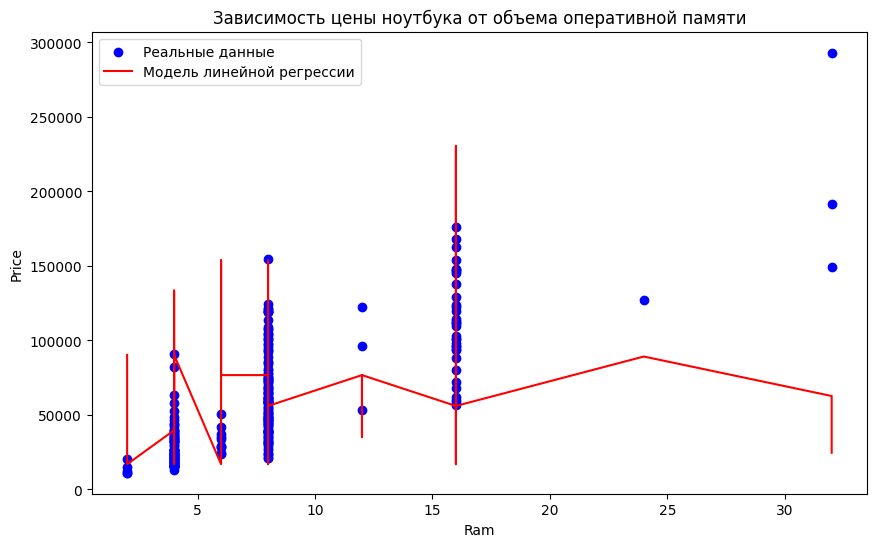

In [96]:
import matplotlib.pyplot as plt

sorted_indices = X_test.sort_values(by='Ram').index
X_test_sorted = X_test.loc[sorted_indices]
y_model_sorted = best_model.predict(X_test)

# Построение графика
plt.figure(figsize=(10, 6))

# Scatter plot для реальных данных
plt.scatter(X_test['Ram'], y_test, color="blue", label="Реальные данные")

# Линия регрессии
plt.plot(X_test_sorted['Ram'], y_model_sorted, color="red", label="Модель линейной регрессии")

# Настройка меток и заголовка
plt.xlabel('Ram')
plt.ylabel('Price')
plt.title('Зависимость цены ноутбука от объема оперативной памяти')
plt.legend()


from sklearn.metrics import r2_score
y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)

print(f"R^2 на тестовой выборке: {r2_test}")


# Отображение графика
plt.show()

Коэффициент детерминации на обучающей выборке: 0.7544660268791125

Коэффициент детерминации на тестовой выборке: 0.7258338636780695


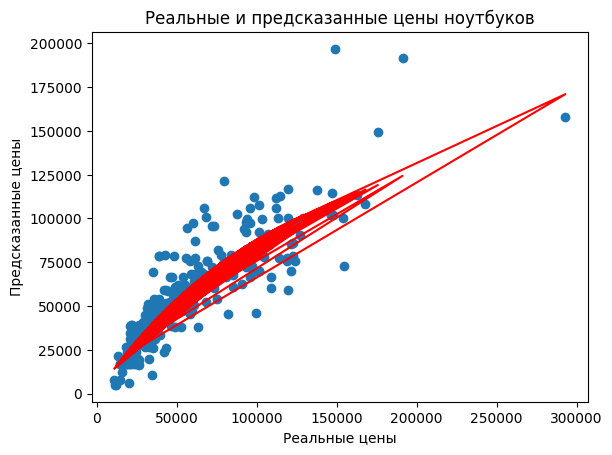

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Создание модели полиномиальной регрессии
model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('linear_regression', LinearRegression())
])

# Обучение модели
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("Коэффициент детерминации на обучающей выборке:", r2)
print()
# Предсказание цен ноутбуков


# Оценка качества модели
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации на тестовой выборке:", r2)


plt.scatter(y_test, y_pred)
plt.xlabel("Реальные цены")
plt.ylabel("Предсказанные цены")
plt.title("Реальные и предсказанные цены ноутбуков")

# Добавление линии тренда
z = np.polyfit(y_test, y_pred, 3)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r")

plt.show()

R^2 на тестовой выборке: 0.7258338636780695


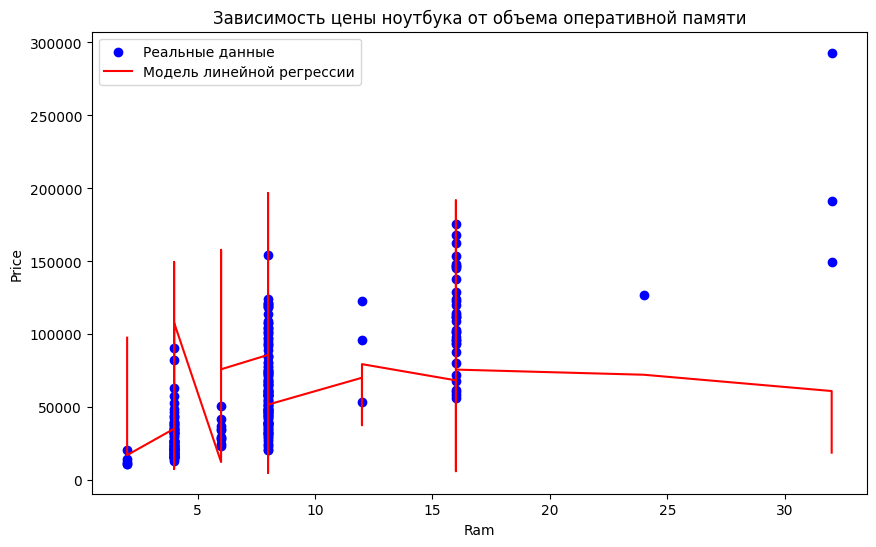

In [98]:
import matplotlib.pyplot as plt

sorted_indices = X_test.sort_values(by='Ram').index
X_test_sorted = X_test.loc[sorted_indices]
y_model_sorted = model.predict(X_test)

# Построение графика
plt.figure(figsize=(10, 6))

# Scatter plot для реальных данных
plt.scatter(X_test['Ram'], y_test, color="blue", label="Реальные данные")

# Линия регрессии
plt.plot(X_test_sorted['Ram'], y_model_sorted, color="red", label="Модель линейной регрессии")

# Настройка меток и заголовка
plt.xlabel('Ram')
plt.ylabel('Price')
plt.title('Зависимость цены ноутбука от объема оперативной памяти')
plt.legend()


from sklearn.metrics import r2_score
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred)

print(f"R^2 на тестовой выборке: {r2_test}")


# Отображение графика
plt.show()